<a href="https://colab.research.google.com/github/thongle28625/ttnt/blob/main/2001230937_LeQuocThong_Buoi5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Bài 1: Cài đặt thuật toán K-Mean**

**1. K-Means Là Gì?**

- **K-Means** là một thuật toán học máy không giám sát (Unsupervised Learning) được sử dụng để giải quyết bài toán phân cụm (Clustering).
- **Mục tiêu**: Phân chia $N$ điểm dữ liệu thành $K$ nhóm (cụm) riêng biệt, sao cho các điểm trong cùng một cụm có sự tương đồng cao hơn các điểm ở cụm khác.
- **Nguyên tắc hoạt động**: Độ tương đồng được đo bằng khoảng cách (thường là khoảng cách Euclidean) từ một điểm dữ liệu đến tâm cụm (centroid). Thuật toán tìm cách tối thiểu hóa tổng bình phương khoảng cách từ các điểm đến tâm cụm gần nhất của chúng.

**2. Ứng dụng**

 **K-Means được sử dụng rộng rãi trong nhiều lĩnh vực**:

**1) Phân khúc Khách hàng (Customer Segmentation)**:

- Chia khách hàng thành các nhóm dựa trên hành vi mua sắm, nhân khẩu học hoặc giá trị trọn đời (LTV) để các đội marketing có thể nhắm mục tiêu chiến dịch chính xác hơn.

**2) Xử lý Hình ảnh (Image Processing)**:**văn bản in đậm**

- **Nén màu (Color Quantization)**: Giảm số lượng màu trong một hình ảnh trong khi vẫn giữ được chất lượng thị giác chấp nhận được. K là số lượng màu cuối cùng.

**3) Hệ thống Gợi ý (Recommender Systems)**:

- Phân cụm người dùng có sở thích tương tự nhau để gợi ý sản phẩm/nội dung mà những người khác trong cùng cụm đã thích.

**4) Phát hiện Bất thường (Anomaly Detection)**:

- Phân cụm dữ liệu, sau đó các điểm nằm rất xa tâm cụm (hoặc không thuộc cụm nào) có thể được coi là điểm bất thường hoặc gian lận.

**3. Thuật Toán K-Means**

Thuật toán K-Means hoạt động thông qua một quá trình lặp đi lặp lại gồm hai bước chính cho đến khi các tâm cụm không còn thay đổi đáng kể nữa (hội tụ).

**Các Bước Thực Hiện**:

**1) Bước Khởi tạo (Initialization)**:

- Chọn trước số cụm $K$ (ví dụ: $K=3$).Chọn ngẫu nhiên $K$ điểm dữ liệu trong tập dữ liệu làm các tâm cụm (Centroids) ban đầu.

**2) Bước Gán nhãn (Assignment/E-step)**:

- Gán mỗi điểm dữ liệu vào tâm cụm gần nhất. Khoảng cách thường dùng là khoảng cách Euclidean.$label(x_i) = \arg\min_{c_j \in C} ||x_i - c_j||^2$

**3) Bước Cập nhật (Update/M-step)**:

- Tính toán lại vị trí mới của mỗi tâm cụm bằng cách lấy giá trị trung bình của tất cả các điểm dữ liệu đã được gán vào cụm đó.$c_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$ (Với $C_j$ là tập hợp các điểm thuộc cụm $j$).

**4) Bước Kiểm tra Hội tụ**:

- Lặp lại Bước 2 và Bước 3 cho đến khi vị trí của các tâm cụm không thay đổi hoặc thay đổi dưới một ngưỡng xác định (hoặc đạt đến số lần lặp tối đa).

Bắt đầu K-Means với tính năng Tô màu vùng Voronoi...


/tmp/ipython-input-1627241822.py:44: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap_fill = plt.cm.get_cmap('viridis', n_cluster) # Bảng màu cho vùng


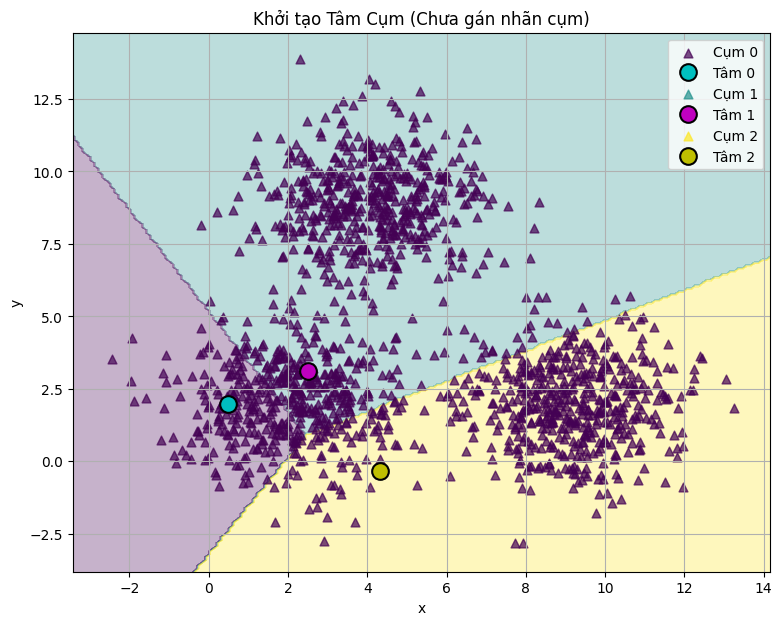

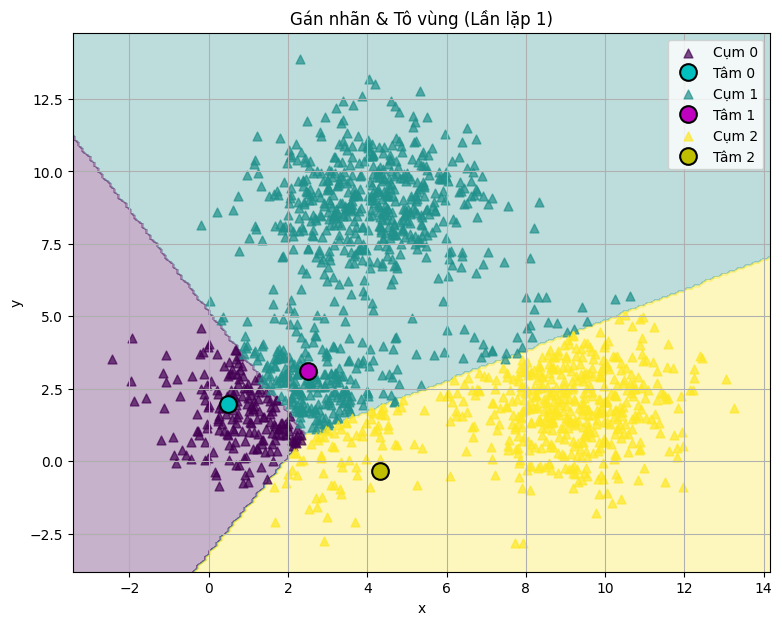

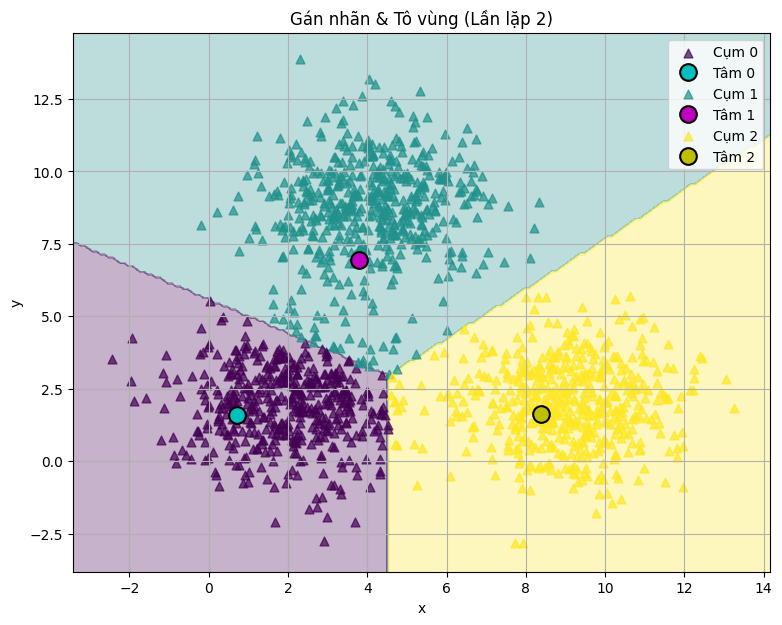

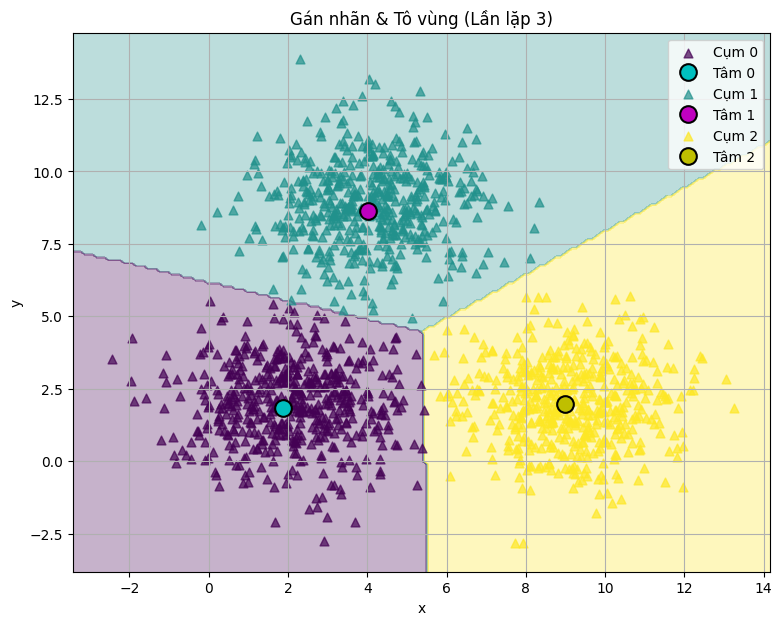

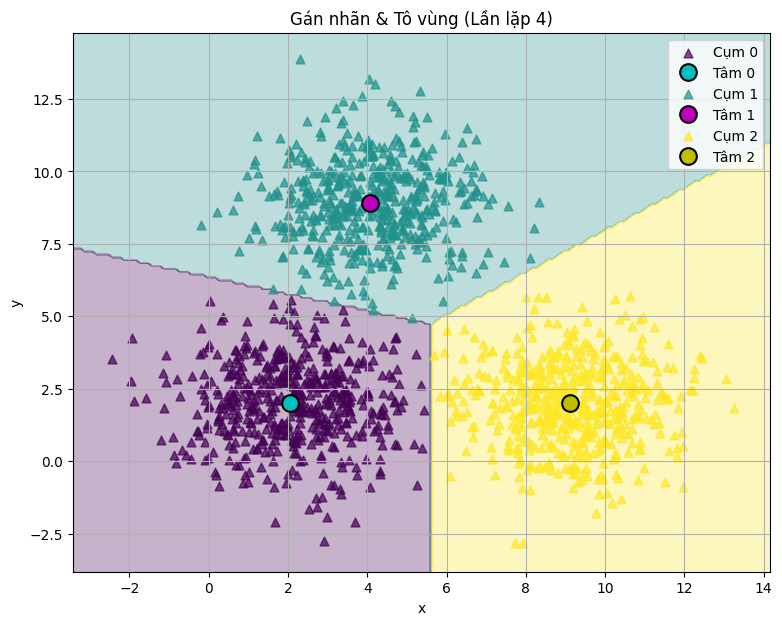

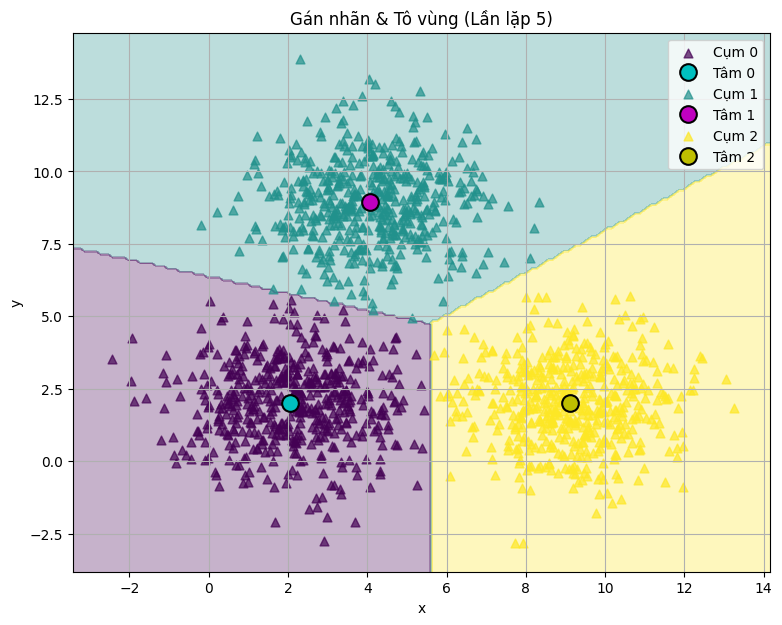


✨ Done! Kmeans has converged after 5 times
Tâm cụm cuối cùng:
 [[2.05833321 2.01923794]
 [4.07621614 8.93875748]
 [9.11761539 1.99741477]]


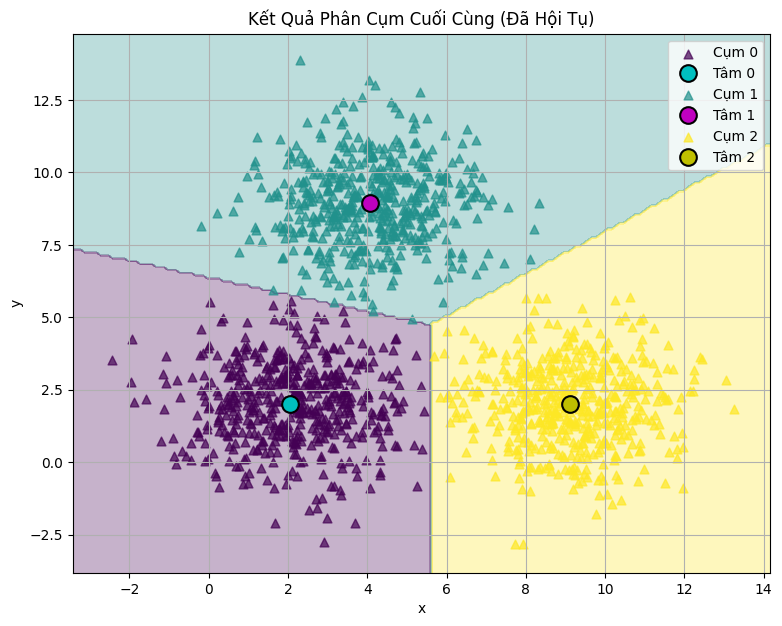

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

# --- KHỞI TẠO DỮ LIỆU ---
means = [[2, 2], [9, 2], [4, 9]]
cov = [[2, 0], [0, 2]]
n_samples = 500
n_cluster = 3

X0 = np.random.multivariate_normal(means[0], cov, n_samples)
X1 = np.random.multivariate_normal(means[1], cov, n_samples)
X2 = np.random.multivariate_normal(means[2], cov, n_samples)
X = np.concatenate((X0, X1, X2), axis = 0)

# --- HÀM HỖ TRỢ K-MEANS CƠ BẢN ---
def kmeans_init_centers(X, n_cluster):
    return X[np.random.choice(X.shape[0], n_cluster, replace=False)]

def kmeans_predict_labels(X, centers):
    D = cdist(X, centers)
    return np.argmin(D, axis = 1)

def kmeans_update_centers(X, labels, n_cluster):
    centers = np.zeros((n_cluster, X.shape[1]))
    for k in range(n_cluster):
        Xk = X[labels == k, :]
        if len(Xk) > 0:
            centers[k,:] = np.mean(Xk, axis = 0)
    return centers

def kmeans_has_converged(centers, new_centers):
    return (set([tuple(a) for a in centers]) == set([tuple(a) for a in new_centers]))

# --- HÀM TRỰC QUAN HÓA CÓ TÔ MÀU VÙNG (Decision Boundary) ---

def kmeans_visualize_with_fill(X, centers, labels, n_cluster, title):
    plt.figure(figsize=(9, 7))
    plt.title(title)
    plt.xlabel('x')
    plt.ylabel('y')

    # Định nghĩa màu cho cụm và tâm
    cmap_fill = plt.cm.get_cmap('viridis', n_cluster) # Bảng màu cho vùng
    plt_colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k', 'tab:orange'] # Màu cho điểm và tâm

    # 1. TẠO LƯỚI VÀ DỰ ĐOÁN NHÃN CHO MỌI ĐIỂM TRÊN LƯỚI (Tô màu vùng)
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), # Bước nhảy 0.1 để có lưới mịn
                         np.arange(y_min, y_max, 0.1))

    # Dự đoán nhãn cho mọi điểm trên lưới bằng các tâm cụm hiện tại
    Z = kmeans_predict_labels(np.c_[xx.ravel(), yy.ravel()], centers)
    Z = Z.reshape(xx.shape)

    # Tô màu nền (Vẽ ranh giới Voronoi)
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_fill)

    # 2. VẼ CÁC ĐIỂM DỮ LIỆU VÀ TÂM CỤM
    for i in range(n_cluster):
        data = X[labels == i]
        # Vẽ các điểm dữ liệu
        plt.scatter(data[:, 0], data[:, 1], c=[cmap_fill(i)], s=40,
                    alpha=0.7, marker='^', label=f'Cụm {i}')

        # Vẽ tâm cụm (dùng màu khác, kích thước lớn hơn)
        center_color_index = (i + n_cluster) % len(plt_colors)
        plt.plot(centers[i][0], centers[i][1], plt_colors[center_color_index] + 'o',
                 markersize=12, label=f'Tâm {i}', markeredgecolor='k', markeredgewidth=1.5)

    plt.legend()
    plt.grid(True)
    plt.show()

# --- THUẬT TOÁN K-MEANS CHÍNH (Sử dụng hàm visualize mới) ---
def kmeans(init_centers, init_labels, X, n_cluster):
    centers = init_centers
    labels = init_labels
    times = 0

    while True:
        times += 1

        # Gán nhãn mới cho các điểm
        labels = kmeans_predict_labels(X, centers)

        # Trực quan hóa kết quả gán nhãn
        kmeans_visualize_with_fill(X, centers, labels, n_cluster, f'Gán nhãn & Tô vùng (Lần lặp {times})')

        # Cập nhật vị trí tâm cụm
        new_centers = kmeans_update_centers(X, labels, n_cluster)

        # Kiểm tra điều kiện dừng
        if kmeans_has_converged(centers, new_centers):
            break

        centers = new_centers

        # Trực quan hóa kết quả cập nhật tâm
        # Giai đoạn này chỉ cập nhật vị trí tâm, vùng vẫn giữ nguyên như sau khi gán nhãn lần trước
        # Nếu muốn thấy vùng thay đổi ngay, ta phải chạy predict_labels lần nữa (nhưng đó là vòng lặp tiếp theo)
        # Để đơn giản, ta chỉ vẽ lại với tâm mới và nhãn cũ
        # kmeans_visualize_with_fill(X, centers, labels, n_cluster, f'Cập nhật Tâm (Lần lặp {times})')

    return (centers, labels, times)

# --- THỰC THI CHƯƠNG TRÌNH ---
print("Bắt đầu K-Means với tính năng Tô màu vùng Voronoi...")

# 1. Khởi tạo
init_centers = kmeans_init_centers(X, n_cluster)
init_labels = np.zeros(X.shape[0], dtype=int)

# 2. Trực quan hóa Khởi tạo (gán nhãn 0)
kmeans_visualize_with_fill(X, init_centers, init_labels, n_cluster, 'Khởi tạo Tâm Cụm (Chưa gán nhãn cụm)')

# 3. Chạy thuật toán K-Means
centers, labels, times = kmeans(init_centers, init_labels, X, n_cluster)

# 4. In kết quả cuối cùng
print('\n✨ Done! Kmeans has converged after', times, 'times')
print('Tâm cụm cuối cùng:\n', centers)

# 5. Trực quan hóa kết quả cuối cùng
kmeans_visualize_with_fill(X, centers, labels, n_cluster, 'Kết Quả Phân Cụm Cuối Cùng (Đã Hội Tụ)')

**Bài 2: Cài đặt thuật toán K-NN**

**1. K-NN Là Gì?**

- **K-Nearest Neighbors (K-NN)** là một thuật toán học máy có giám sát **(Supervised Learning)** đơn giản nhưng mạnh mẽ, chủ yếu được sử dụng cho các bài toán phân loại **(Classification)** và hồi quy **(Regression)**.

- **Nguyên tắc hoạt động**: K-NN được gọi là thuật toán "lười biếng" **(Lazy Learner)** vì nó không thực hiện quá trình huấn luyện mô hình phức tạp. Thay vào đó, nó lưu trữ toàn bộ tập dữ liệu huấn luyện và chỉ tính toán khi có một điểm dữ liệu mới cần dự đoán.

**2. Ứng Dụng Phổ Biến của K-NN**

K-NN được sử dụng rộng rãi nhờ tính đơn giản và hiệu quả trong nhiều tình huống:

**1) Hệ thống Gợi ý (Recommender Systems)**:
- Tìm kiếm người dùng có sở thích tương tự nhau (láng giềng gần nhất) để gợi ý sản phẩm/nội dung.

**2) Phân loại Hình ảnh và Nhận dạng Ký tự**:
- Phân loại một đối tượng hoặc ký tự mới bằng cách so sánh nó với các đối tượng/ký tự đã được gán nhãn trong cơ sở dữ liệu.

**3) Y học (Dự đoán Bệnh)**:
- Dự đoán một bệnh lý dựa trên các trường hợp bệnh nhân có triệu chứng tương tự đã được chẩn đoán trước đó.

**4) Phát hiện Gian lận (Fraud Detection)**:
- Phân loại một giao dịch là gian lận hay không bằng cách so sánh nó với các giao dịch gần đó.

**3. Thuật Toán K-NN**

K-NN là thuật toán đơn giản, không có bước huấn luyện rõ ràng. Quá trình xử lý diễn ra hoàn toàn trong bước dự đoán:

**Các Bước Thực Hiện (Khi có điểm dữ liệu mới $x_{new}$):**

**1) Chọn $K$**:
- Xác định số lượng láng giềng $K$ mà thuật toán sẽ xem xét. $K$ thường là một số lẻ (ví dụ: $3, 5, 7$) để tránh trường hợp hòa phiếu.

**2) Tính Khoảng cách**:
- Tính khoảng cách từ điểm dữ liệu mới $x_{new}$ đến mọi điểm dữ liệu trong tập huấn luyện $X_{train}$. Khoảng cách Euclidean là phổ biến nhất.$$d(x_i, x_{new}) = \sqrt{\sum_{j=1}^{p} (x_{i,j} - x_{new,j})^2}$$

**3) Tìm $K$ Láng Giềng**:
- Sắp xếp tất cả các khoảng cách đã tính ở Bước 2 theo thứ tự tăng dần và chọn ra $K$ điểm dữ liệu có khoảng cách nhỏ nhất (gần nhất).

**4) Bỏ phiếu (Voting) và Dự đoán**:
- **Phân loại**: Đếm số lượng nhãn của $K$ láng giềng này. Nhãn nào xuất hiện nhiều nhất sẽ được gán cho $x_{new}$ (bỏ phiếu đa số).
- **Hồi quy**: Lấy giá trị trung bình của $K$ giá trị đầu ra (outcome) của $K$ láng giềng.

1. Tìm K Tối Ưu bằng GridSearchCV:
Giá trị K tối ưu tìm được qua GridSearchCV: K = 2


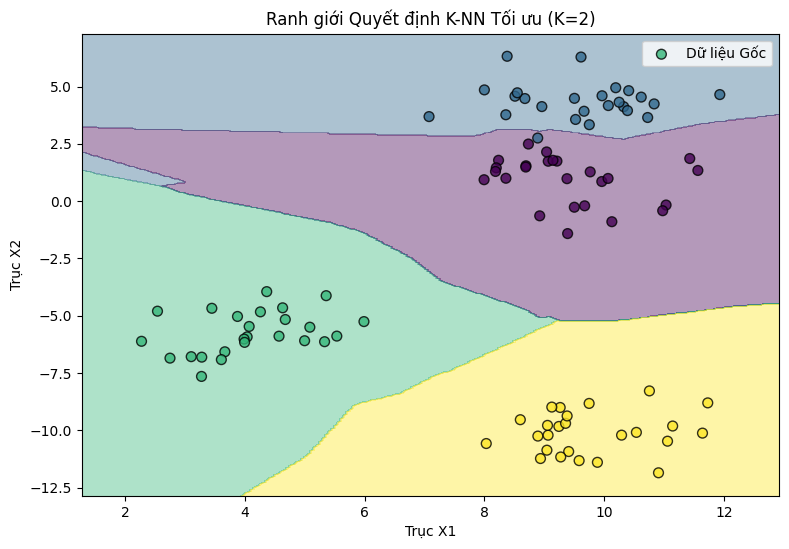


2. Dự đoán nhãn bằng hàm KNN tự cài đặt (K=3):
Điểm cần dự đoán: [1 3]
Nhãn dự đoán là: 0


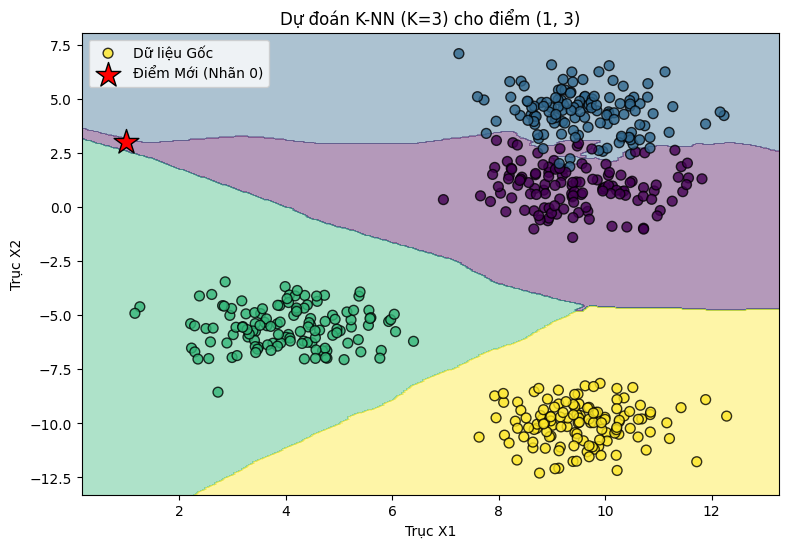

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from collections import Counter

# --- KHỞI TẠO VÀ CHIA DỮ LIỆU ---

# Khởi tạo Dữ liệu (100 mẫu, 4 lớp)
X, y = make_blobs(n_samples=100, n_features=2, centers=4, cluster_std=1, random_state=4)

# Chia tập dữ liệu (75% Train, 25% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

# --- 1. HÀM TÔ MÀU VÙNG PHÂN LOẠI (ĐÃ SỬA LỖI DEPRECATION) ---

def plot_knn_decision_boundary(X_data, y_data, model, title, highlight_point=None, predicted_label=None):
    """
    Vẽ ranh giới quyết định (Decision Boundary) và tô màu vùng phân loại của mô hình K-NN.
    """
    plt.figure(figsize=(9, 6))

    # Xác định giới hạn và tạo lưới (grid)
    x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    # Dự đoán nhãn cho mọi điểm trên lưới
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Khắc phục lỗi MatplotlibDeprecationWarning
    N_classes = len(np.unique(y_data))
    # Sử dụng cú pháp mới plt.colormaps[name].resampled(N)
    cmap = plt.colormaps['viridis'].resampled(N_classes)

    # Tô màu nền (vùng quyết định)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)

    # Vẽ các điểm dữ liệu (Train/Test)
    plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=50, cmap=cmap,
                edgecolor='k', marker='o', alpha=0.8, label='Dữ liệu Gốc')

    # Highlight điểm dự đoán nếu có
    if highlight_point is not None:
        plt.scatter(highlight_point[0], highlight_point[1],
                    marker='*', s=350, c='red', edgecolor='black',
                    label=f'Điểm Mới (Nhãn {predicted_label})')

    plt.title(title)
    plt.xlabel('Trục X1')
    plt.ylabel('Trục X2')
    plt.legend()
    plt.show()

# --- 2. TÌM K TỐI ƯU VÀ HUẤN LUYỆN MODEL ---

print("1. Tìm K Tối Ưu bằng GridSearchCV:")

knn_grid = GridSearchCV(estimator=KNeighborsClassifier(),
                        param_grid={'n_neighbors': np.arange(1, 10)},
                        cv=5)
knn_grid.fit(X, y)

best_k = knn_grid.best_params_['n_neighbors']
print(f"Giá trị K tối ưu tìm được qua GridSearchCV: K = {best_k}")

# Huấn luyện mô hình K-NN cuối cùng với K tối ưu
knn_optimal = KNeighborsClassifier(n_neighbors=best_k)
knn_optimal.fit(X_train, y_train)

# Trực quan hóa ranh giới quyết định của mô hình tối ưu
plot_knn_decision_boundary(X, y, knn_optimal, f'Ranh giới Quyết định K-NN Tối ưu (K={best_k})')


# --- 3. HÀM KNN TỰ CÀI ĐẶT (Sử dụng lại hàm bạn đã cung cấp) ---

def KNN(X_train, X_test_data, y_train, k):
    if X_test_data.ndim == 1:
        X_test = X_test_data.reshape(1, -1)
    else:
        X_test = X_test_data

    num_test = X_test.shape[0]
    results = []

    for i in range(num_test):
        distances = np.sqrt(np.sum(np.power(X_train - X_test[i, :], 2), axis=1))

        zipped = zip(distances, y_train)
        res = sorted(zipped, key=lambda x: x[0])
        results_topk = res[:k]

        k_neighbor_labels = [label for _, label in results_topk]
        most_common_label = Counter(k_neighbor_labels).most_common(1)[0][0]

        results.append(most_common_label)

    return np.array(results)

# --- 4. THỰC THI DEMO VÀ TRỰC QUAN HÓA ĐIỂM MỚI ---

# Dữ liệu lớn hơn (500 mẫu) để minh họa hàm KNN tự cài đặt
(X_full, y_full) = make_blobs(n_samples=500, n_features=2, centers=4, cluster_std=1, random_state=4)
X_test_point = np.array([(1, 3)])
k_used = 3 # Sử dụng k=3 cho ví dụ

predicted_label = KNN(X_full, X_test_point, y_full, k_used)[0]

print(f"\n2. Dự đoán nhãn bằng hàm KNN tự cài đặt (K={k_used}):")
print(f"Điểm cần dự đoán: {X_test_point[0]}")
print(f"Nhãn dự đoán là: {predicted_label}")

# Trực quan hóa kết quả dự đoán điểm mới trên nền ranh giới quyết định (dùng K=3)
knn_for_point = KNeighborsClassifier(n_neighbors=k_used)
knn_for_point.fit(X_full, y_full)

plot_knn_decision_boundary(X_full, y_full, knn_for_point,
                           f'Dự đoán K-NN (K={k_used}) cho điểm ({X_test_point[0, 0]}, {X_test_point[0, 1]})',
                           highlight_point=X_test_point[0], predicted_label=predicted_label)

**Bài 3: Cài đặt demo cho 2 thuật toán K-Mean và K-NN**

Tổng số điểm dữ liệu: 500. Số lớp/cụm: 4


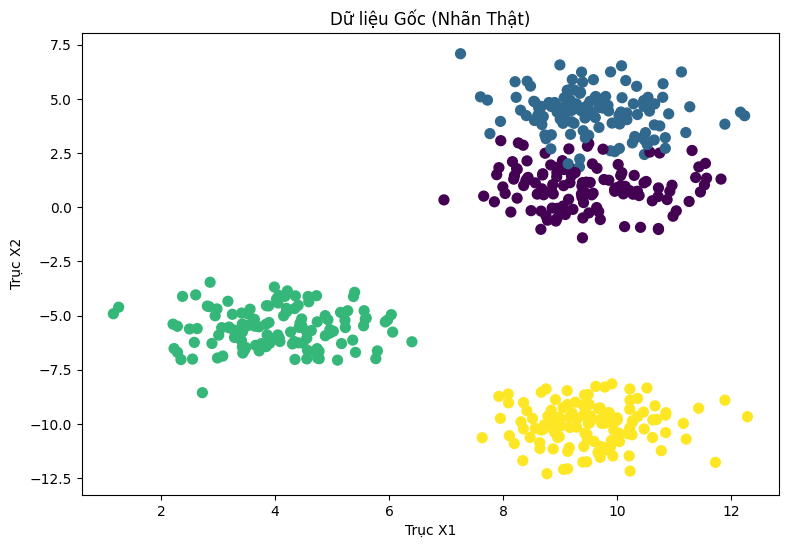


             PHẦN 1: K-MEANS CLUSTERING
Tâm cụm K-Means tìm được:
[[  9.54 -10.03]
 [  9.48   0.87]
 [  4.04  -5.56]
 [  9.55   4.37]]


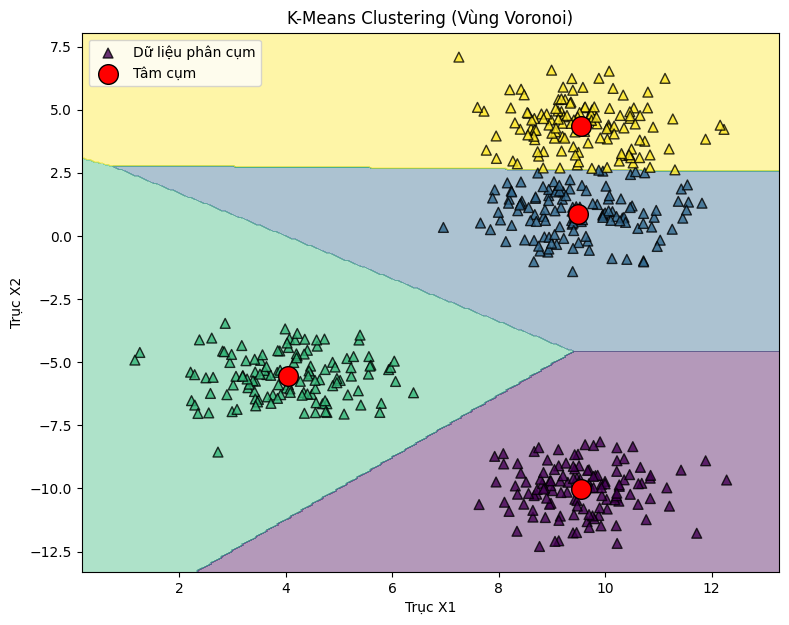


             PHẦN 2: K-NN CLASSIFIER
Dữ liệu Huấn luyện: 350 mẫu, Dữ liệu Kiểm tra: 150 mẫu
Giá trị K tối ưu cho K-NN: K = 1
Độ chính xác trên tập kiểm tra với K=1: 0.9667


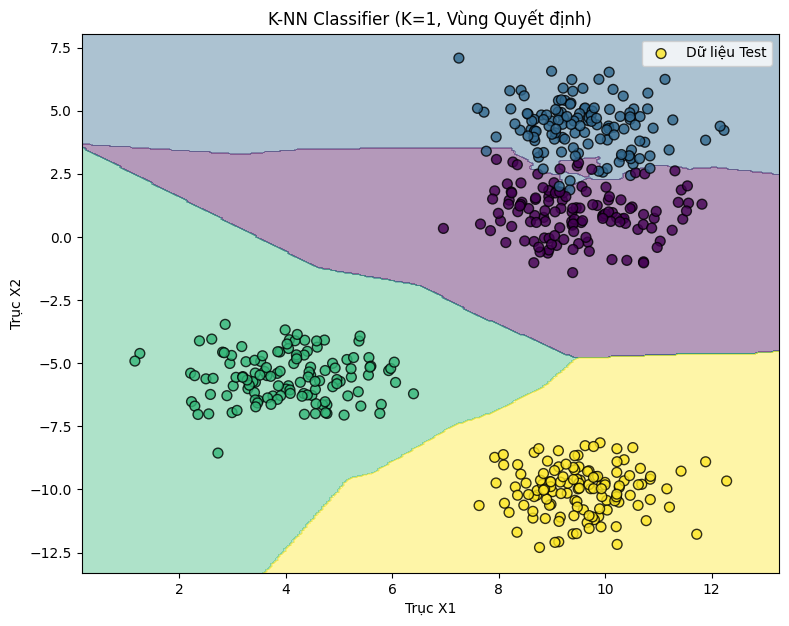

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score

# Sửa lỗi MatplotlibDeprecationWarning
def get_resampled_cmap(name, N):
    """Lấy bảng màu đã chia mẫu lại (resampled) theo cú pháp mới."""
    return plt.colormaps[name].resampled(N)

def plot_decision_boundary(X_data, y_data, model, title, is_kmeans=False, centers=None):
    """Vẽ ranh giới quyết định (Decision Boundary) và tô màu vùng phân loại/cụm."""
    plt.figure(figsize=(9, 7))

    N_classes = len(np.unique(y_data))
    cmap = get_resampled_cmap('viridis', N_classes)

    # 1. Tạo lưới (grid) và dự đoán nhãn cho mọi điểm trên lưới
    x_min, x_max = X_data[:, 0].min() - 1, X_data[:, 0].max() + 1
    y_min, y_max = X_data[:, 1].min() - 1, X_data[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05),
                         np.arange(y_min, y_max, 0.05))

    # Đối với K-Means, mô hình không có hàm predict. Ta dự đoán nhãn dựa trên tâm cụm.
    if is_kmeans:
        from scipy.spatial.distance import cdist
        # Dự đoán nhãn bằng cách tìm tâm cụm gần nhất
        Z = np.argmin(cdist(np.c_[xx.ravel(), yy.ravel()], centers), axis=1)
    else:
        # Đối với K-NN (scikit-learn), sử dụng hàm predict
        Z = model.predict(np.c_[xx.ravel(), yy.ravel()])

    Z = Z.reshape(xx.shape)

    # Tô màu nền (vùng quyết định/Voronoi)
    plt.contourf(xx, yy, Z, alpha=0.4, cmap=cmap)

    # 2. Vẽ các điểm dữ liệu và tâm cụm
    if is_kmeans:
        # Vẽ điểm dữ liệu đã gán nhãn cụm và Tâm
        plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=50, cmap=cmap,
                    edgecolor='k', marker='^', alpha=0.8, label='Dữ liệu phân cụm')
        plt.scatter(centers[:, 0], centers[:, 1], marker='o', s=200,
                    c='red', edgecolors='black', label='Tâm cụm')
    else:
        # Vẽ điểm dữ liệu đã gán nhãn phân loại
        plt.scatter(X_data[:, 0], X_data[:, 1], c=y_data, s=50, cmap=cmap,
                    edgecolor='k', marker='o', alpha=0.8, label='Dữ liệu Test')

    plt.title(title)
    plt.xlabel('Trục X1')
    plt.ylabel('Trục X2')
    plt.legend()
    plt.show()


### 🚀 Chương Trình Chính (Demo)
# --- 1. Tạo Dữ Liệu Mô Phỏng (4 lớp) ---
N_SAMPLES = 500
N_CLUSTERS = 4
RANDOM_STATE = 4

X, y = make_blobs(n_samples=N_SAMPLES, n_features=2, centers=N_CLUSTERS,
                  cluster_std=1.0, random_state=RANDOM_STATE)

print(f"Tổng số điểm dữ liệu: {X.shape[0]}. Số lớp/cụm: {N_CLUSTERS}")

# --- 2. Trực Quan Hóa Dữ Liệu Gốc ---
plt.figure(figsize=(9, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, marker='o', s=50, cmap='viridis')
plt.title('Dữ liệu Gốc (Nhãn Thật)')
plt.xlabel('Trục X1')
plt.ylabel('Trục X2')
plt.show()

# =========================================================
#             PHẦN 1: K-MEANS CLUSTERING (Unsupervised)
# =========================================================
print("\n" + "="*50)
print("             PHẦN 1: K-MEANS CLUSTERING")
print("="*50)

# --- 3. Áp dụng K-Means ---
kmeans = KMeans(n_clusters=N_CLUSTERS, init='k-means++', n_init=10, random_state=RANDOM_STATE)
kmeans.fit(X)

kmeans_labels = kmeans.labels_
kmeans_centers = kmeans.cluster_centers_

# --- 4. Trực Quan Hóa Kết Quả K-Means (Có tô màu vùng) ---
print(f"Tâm cụm K-Means tìm được:\n{kmeans_centers.round(2)}")
plot_decision_boundary(X, kmeans_labels, kmeans, 'K-Means Clustering (Vùng Voronoi)', is_kmeans=True, centers=kmeans_centers)
#

# =========================================================
#             PHẦN 2: K-NN CLASSIFIER (Supervised)
# =========================================================
print("\n" + "="*50)
print("             PHẦN 2: K-NN CLASSIFIER")
print("="*50)

# --- 5. Chuẩn bị Dữ liệu cho K-NN (Tách Train/Test) ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_STATE)
print(f"Dữ liệu Huấn luyện: {X_train.shape[0]} mẫu, Dữ liệu Kiểm tra: {X_test.shape[0]} mẫu")

# --- 6. Tìm K Tối Ưu cho K-NN bằng Cross-Validation ---
k_range = range(1, 16)
k_scores = []

for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')
    k_scores.append(scores.mean())

optimal_k = k_range[np.argmax(k_scores)]
print(f"Giá trị K tối ưu cho K-NN: K = {optimal_k}")

# --- 7. Huấn luyện và Đánh giá K-NN với K Tối Ưu ---
knn_optimal = KNeighborsClassifier(n_neighbors=optimal_k)
knn_optimal.fit(X_train, y_train)
accuracy = knn_optimal.score(X_test, y_test)

print(f"Độ chính xác trên tập kiểm tra với K={optimal_k}: {accuracy:.4f}")

# --- 8. Trực Quan Hóa Kết Quả Phân Loại K-NN (Có tô màu vùng) ---
# Sử dụng toàn bộ dữ liệu (X, y) để vẽ ranh giới tổng quát
plot_decision_boundary(X, y, knn_optimal, f'K-NN Classifier (K={optimal_k}, Vùng Quyết định)', is_kmeans=False)
#